<font size=24>“钉钉杯”大数据挑战赛</font>

# 任务
- 选题：A
- 数据集文件：card_transdata.csv

# 代码部分

## 导入包

In [1]:
#导入常用包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd  
%matplotlib inline

#导入机器学习包
from sklearn.linear_model import LogisticRegression   #逻辑回归
from sklearn.svm import SVC, LinearSVC                #SVC
from sklearn.ensemble import RandomForestClassifier   #随机森林
from sklearn.neighbors import KNeighborsClassifier    #KNN
from sklearn.naive_bayes import GaussianNB            #贝叶斯
from sklearn.linear_model import Perceptron           #感知机
from sklearn.linear_model import SGDClassifier        #SGD
from sklearn.tree import DecisionTreeClassifier       #决策树

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#其他包
import warnings
warnings.filterwarnings("ignore")

## 数据读取

In [3]:
df=pd.read_csv('card_transdata.csv')

## EDA

### 数据查看

#### 查看前5行数据

In [4]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<font color='#ff590b'><font size=5> 包含7个属性：
    
➢ distance_from_home：银行卡交易地点与家的距离； 

➢ distance_from_last_transaction：与上次交易发生的距离；

➢ ratio_to_median_purchase_price：近一次交易与以往交易价格中位数的比率；

➢ repeat_retailer：交易是否发生在同一个商户；

➢ used_chip：是通过芯片（银行卡）进行的交易；

➢ used_pin_number：交易时是否使用了 PIN码；

➢ online_order：是否是在线交易订单；

➢ fraud：诈骗行为（分类标签）；</font><br/>

#### 查看数据行数列数

In [5]:
df.shape

(1000000, 8)

#### 查看数据基本信息

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


#### 查看缺失值

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<font color='#ff590b'><font size=5> 没有缺失值</font><br/>

####  查看数据统计信息

In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


#### 自相关矩阵

In [9]:
df.corr().round(4)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.0000,0.0002,-0.0014,0.1431,-0.0007,-0.0016,-0.0013,0.1876
distance_from_last_transaction,0.0002,1.0000,0.0010,-0.0009,0.0021,-0.0009,0.0001,0.0919
ratio_to_median_purchase_price,-0.0014,0.0010,1.0000,0.0014,0.0006,0.0009,-0.0003,0.4623
repeat_retailer,0.1431,-0.0009,0.0014,1.0000,-0.0013,-0.0004,-0.0005,-0.0014
used_chip,-0.0007,0.0021,0.0006,-0.0013,1.0000,-0.0014,-0.0002,-0.0610
used_pin_number,-0.0016,-0.0009,0.0009,-0.0004,-0.0014,1.0000,-0.0003,-0.1003
online_order,-0.0013,0.0001,-0.0003,-0.0005,-0.0002,-0.0003,1.0000,0.1920
fraud,0.1876,0.0919,0.4623,-0.0014,-0.0610,-0.1003,0.1920,1.0000


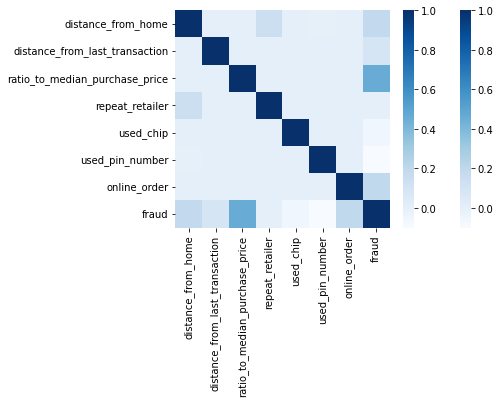

In [10]:
sns.heatmap(df.corr().round(4),  fmt='.20g', cmap=plt.cm.Blues)
sns.heatmap(df.corr().round(4),  fmt='.20g', cmap=plt.cm.Blues).get_figure().savefig('./2.png')

### 单个属性数据探索

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


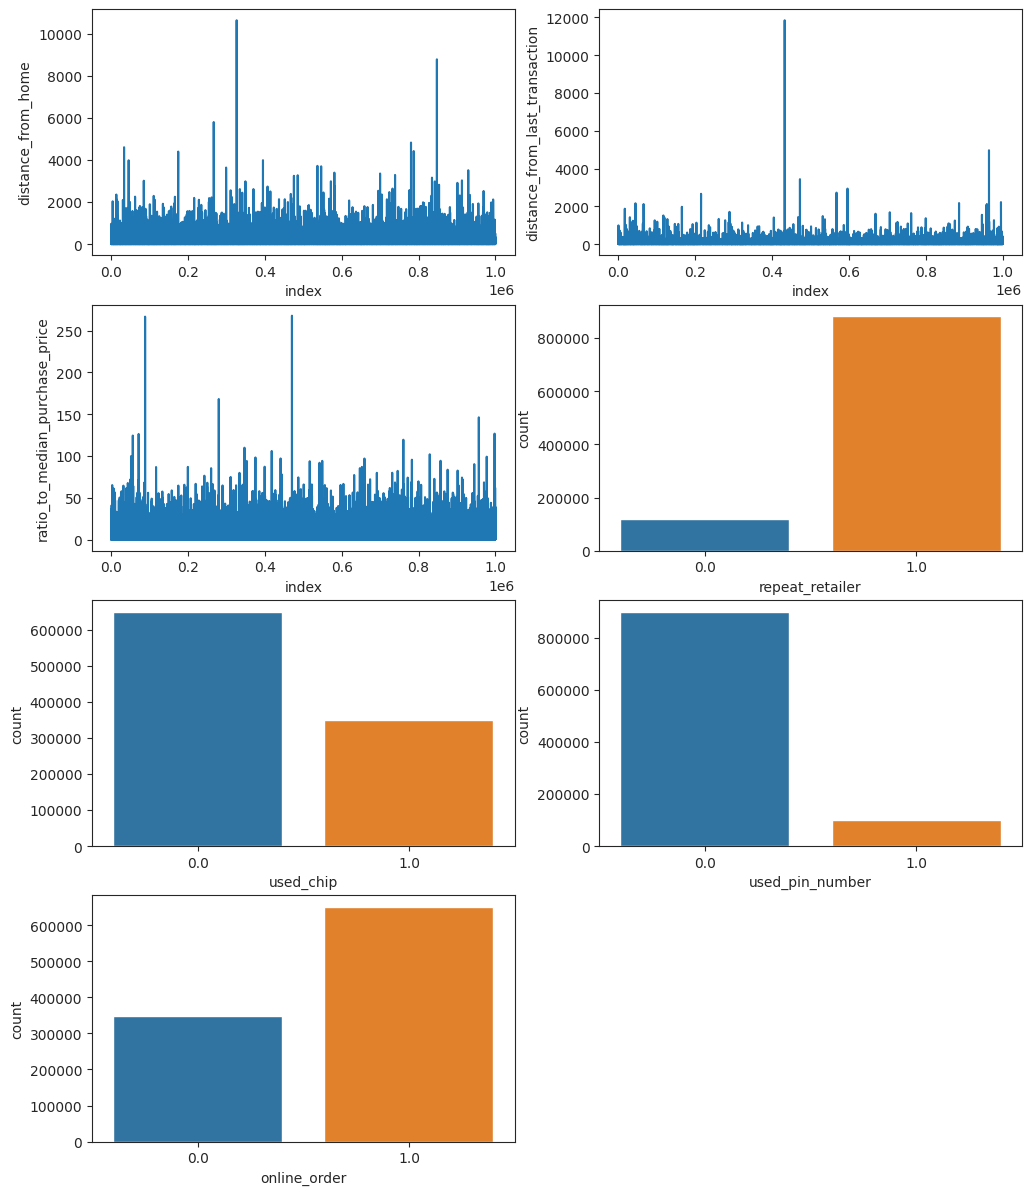

In [11]:
with sns.axes_style("ticks"):
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    fig =plt.figure(figsize=(12, 15), dpi=100)
   
    ax1=fig.add_subplot(421)
    ax1=df['distance_from_home'].plot(xlabel='index',ylabel='distance_from_home',title=None).get_figure()
   
    
    ax2=fig.add_subplot(422)
    ax2=df['distance_from_last_transaction'].plot(xlabel='index',ylabel='distance_from_last_transaction',title=None).get_figure()
 
    
    ax3=fig.add_subplot(423)
    ax3=df['ratio_to_median_purchase_price'].plot(xlabel='index',ylabel='ratio_to_median_purchase_price',title=None).get_figure()

    
    ax4=fig.add_subplot(424)
    ax4=sns.countplot(x=df.repeat_retailer,data=df)
    
  
    ax5=fig.add_subplot(425)
    ax5=sns.countplot(x=df.used_chip,data=df)
   
    
    ax6=fig.add_subplot(426)
    ax6=sns.countplot(x=df.used_pin_number,data=df)
   
    
    ax7=fig.add_subplot(427)
    ax7=sns.countplot(x=df.online_order,data=df)

    
    plt.savefig(r"./1.png")
    plt.show()

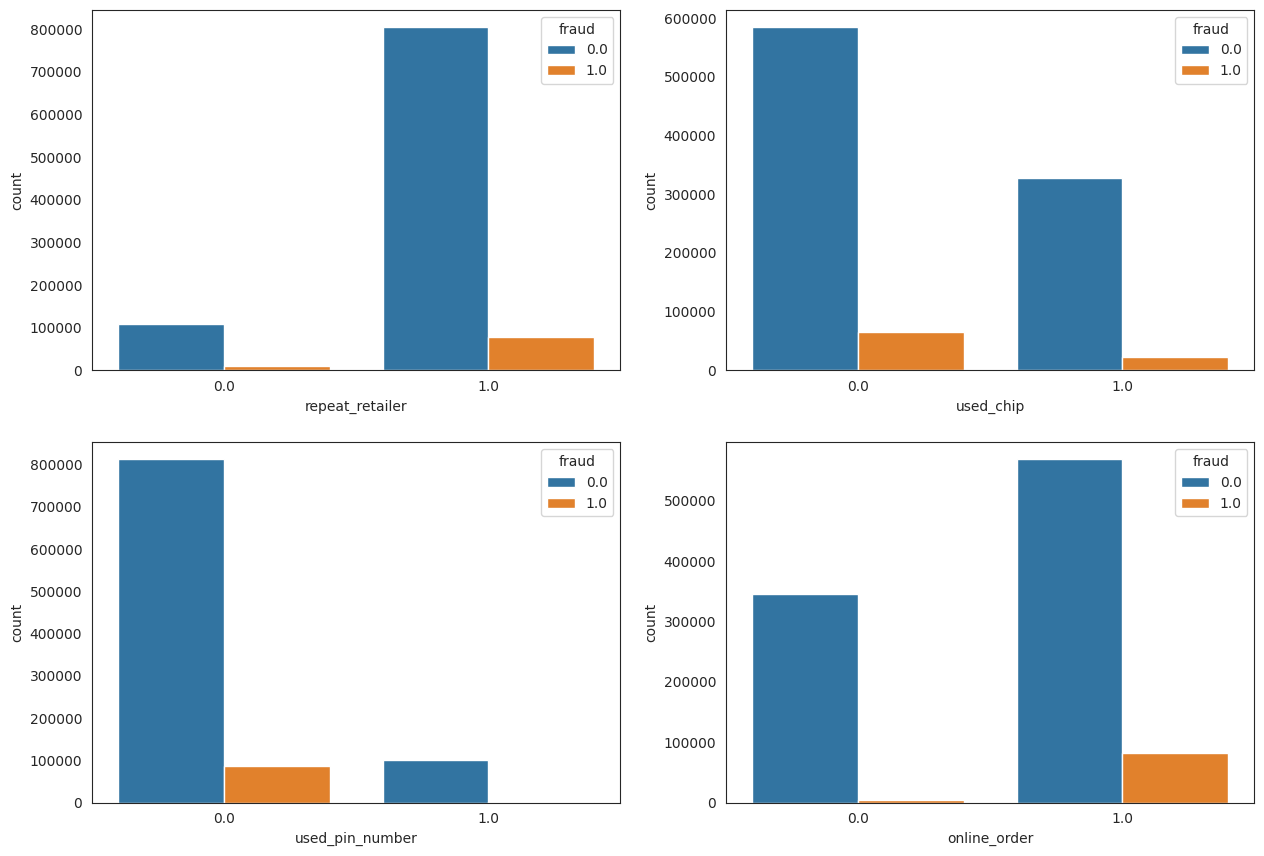

In [12]:
with sns.axes_style("white"):
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    fig =plt.figure(figsize=(15, 10.5), dpi=100)

    
    ax4=fig.add_subplot(221)
    ax4=sns.countplot(hue=df.fraud, x=df.repeat_retailer, data=df).get_figure()
    
  
    ax5=fig.add_subplot(222)
    ax5=sns.countplot(hue=df.fraud, x=df.used_chip, data=df).get_figure()
   
    
    ax6=fig.add_subplot(223)
    ax6=sns.countplot(hue=df.fraud, x=df.used_pin_number, data=df).get_figure()
   
    
    ax7=fig.add_subplot(224)
    ax7=sns.countplot(hue=df.fraud, x=df.online_order, data=df).get_figure()

    
    plt.savefig(r"./3.png")
    plt.show()

## 特征工程

### 数据预处理

In [13]:
'''
train_x=df.iloc[0:700000,0:7]
train_y=df.iloc[0:700000,[7]]
test_x=df.iloc[700000:,0:7]
test_y=df.iloc[700000:,[7]]
'''

'\ntrain_x=df.iloc[0:700000,0:7]\ntrain_y=df.iloc[0:700000,[7]]\ntest_x=df.iloc[700000:,0:7]\ntest_y=df.iloc[700000:,[7]]\n'

In [14]:
from sklearn.preprocessing import StandardScaler
df.iloc[:,0:3]=StandardScaler().fit_transform(df.iloc[:,0:3])
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0


In [15]:
df.insert (4 ,'repeat_retailer_hot', (df['repeat_retailer']==0).astype('float32')),df.insert (6 ,'used_chip_hot', (df['used_chip']==0).astype('float32'))
df.insert (8 ,'used_pin_number_hot', (df['used_pin_number']==0).astype('float32')),df.insert (10 ,'online_order_hot', (df['online_order']==0).astype('float32'))
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,repeat_retailer_hot,used_chip,used_chip_hot,used_pin_number,used_pin_number_hot,online_order,online_order_hot,fraud
0,0.477882,-0.182849,0.043491,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:11]
y=df.iloc[:,[11]]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=420)
[train_x.shape,train_y.shape,test_x.shape,test_y.shape]

[(700000, 11), (700000, 1), (300000, 11), (300000, 1)]

### 问题一

#### 逻辑回归

In [17]:
#逻辑回归
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
acc_log = round(logreg.score(test_x, test_y) * 100, 2)
acc_log

95.83

#### KNN

In [18]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_x, train_y)
acc_knn = round(knn.score(test_x, test_y) * 100, 2)
acc_knn

99.85

#### 朴素贝叶斯

In [19]:
#朴素贝叶斯
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
acc_gaussian = round(gaussian.score(test_x, test_y) * 100, 2)
acc_gaussian

64.92

#### 感知机

In [20]:
#感知机
perceptron = Perceptron()
perceptron.fit(train_x, train_y)
acc_perceptron = round(perceptron.score(test_x, test_y) * 100, 2)
acc_perceptron

96.05

#### 线性SVC

In [21]:
#线性SVC
linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
acc_linear_svc = round(linear_svc.score(test_x, test_y) * 100, 2)
acc_linear_svc

94.7

#### 随机剃度下降

In [22]:
#随机剃度下降
sgd = SGDClassifier()
sgd.fit(train_x, train_y)
acc_sgd = round(sgd.score(test_x, test_y) * 100, 2)
acc_sgd

95.94

#### 决策树

In [23]:
#决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
acc_decision_tree = round(decision_tree.score(test_x, test_y) * 100, 2)
acc_decision_tree

100.0

#### 随机森林

In [ ]:
#随机森林
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
acc_random_forest = round(random_forest.score(test_x, test_y) * 100, 2)
acc_random_forest

#### LGB

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

In [ ]:
# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [ ]:
# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=50, valid_sets=lgb_eval, early_stopping_rounds=20)

In [ ]:
# 模型保存
gbm.save_model('model.txt')

In [ ]:
# 模型加载
gbm = lgb.Booster(model_file='model.txt')

In [ ]:
# 模型预测
y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0


# 模型评估
print('The rmse of prediction is:',accuracy_score(test_y, y_pred) * 100)
acc_LGB=accuracy_score(test_y, y_pred) * 100

#### XGB

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest= xgb.DMatrix(test_x, label=test_y)

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 10,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.007,                  # 如同学习率
    'seed': 1000,
    'nthread': -1,                  # cpu 线程数
    'eval_metric':'auc'
}

In [ ]:
num_round = 10
bst = xgb.train( params, dtrain, num_round)

In [ ]:
# 3.保存模型
bst.save_model('0001.model')

In [ ]:
# 4.加载保存的模型：
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('0001.model')  # load data

In [ ]:
# 6.预测
ypred = bst.predict(dtest)

In [ ]:
ypred 

In [ ]:
print('The rmse of prediction is:',accuracy_score(test_y, y_pred) * 100)
acc_XGB=accuracy_score(test_y, y_pred) * 100

#### 综合比较

In [ ]:
#模型比较
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','LGB','XGB'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_LGB,acc_XGB]})
models.sort_values(by='Score', ascending=False)

## 模型调参与性能评价

### 随机森林

In [ ]:
#随机森林
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
cross_val_score(random_forest,x,y,cv=5,scoring="accuracy")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
    
    #调参代码，一运行完毕，选出最佳参数如下：
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier

    #初步定义分类器
    rfc = RandomForestClassifier(random_state=0)
    #需要选择的参数名称一起后选值
    #第一次调：tuned_parameters = [{ 'n_estimators':[75,100,125,150]}]
    tuned_parameters = [{ 'n_estimators':range(25,75,1),"criterion":["gini","entropy"]}]
    #神器出场,cv设置交叉验证
    clf = GridSearchCV(estimator=rfc,param_grid=tuned_parameters, cv=5, n_jobs=-1)
    #拟合训练集
    #第一次调:clf.fit(x.iloc[:100000,:], y.iloc[:100000,:])
    clf.fit(x, y)
    print('Best parameters:')
    print(clf.best_params_)
    print(clf.best_score_)
    
    # Best parameters:
    criterion_best='gini' 
    n_estimators_best= 35 
    scores_best=0.999989

In [ ]:
rfc = RandomForestClassifier(n_estimators= n_estimators_best,criterion=criterion_best,random_state=0)
rfc.fit(train_x,train_y)
y_pred = rfc.predict(test_x)

In [ ]:
cross_val_score(rfc,x,y,cv=5,scoring="accuracy")

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(test_y, y_pred))  

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(test_y, y_pred)) 

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(test_y, y_pred)) 

In [ ]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(test_y, y_pred)
C

In [ ]:
sns.heatmap(C, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## 决策树

In [ ]:
#决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
cross_val_score(decision_tree,x,y,cv=5,scoring="accuracy")

In [ ]:
    '''
    from sklearn.model_selection import GridSearchCV
    #初步定义分类器
    det = DecisionTreeClassifier(random_state=0,criterion="entropy")
    #第一次调：tuned_parameters = [{ 'max_depth':range(10,75,5),"criterion":["gini","entropy"]}]
    tuned_parameters = [{ 'max_depth':range(6,15,1)}]
    #神器出场,cv设置交叉验证
    clf = GridSearchCV(estimator=det,param_grid=tuned_parameters, cv=5, n_jobs=-1)
    #拟合训练集
    #第一次调:clf.fit(x.iloc[:100000,:], y.iloc[:100000,:])
    clf.fit(x, y)
    print('Best parameters:')
    print(clf.best_params_)
    print(clf.best_score_)
    '''
    #Best parameters:
    max_depth_best= 7
    best_scores=0.99999

In [ ]:
det = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=7)
det.fit(train_x,train_y)
y_pred_det = det.predict(test_x)

In [ ]:
cross_val_score(det,x,y,cv=5,scoring="accuracy")

In [ ]:
precision_score(test_y, y_pred_det),recall_score(test_y, y_pred_det),f1_score(test_y, y_pred_det)

In [ ]:
cm_det=confusion_matrix(test_y, y_pred_det)
sns.heatmap(cm_det, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred_det)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## KNN

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_x, train_y)
cross_val_score(knn,x,y,cv=5,scoring="accuracy")

In [ ]:
np.array([0.99998 , 0.999995, 0.999985, 0.99998 , 0.999995]).mean()

In [ ]:
    '''
    from sklearn.model_selection import GridSearchCV
    #初步定义分类器
    knn = KNeighborsClassifier()
    tuned_parameters = [{ 'n_neighbors':[1,2,3,4,5]}]
    #神器出场,cv设置交叉验证
    clf = GridSearchCV(estimator=knn,param_grid=tuned_parameters, cv=5, n_jobs=-1)
    #拟合训练集
    clf.fit(x, y)
    print('Best parameters:')
    print(clf.best_params_)
    print(clf.best_score_)
    '''
    
    #Best parameters:
        #{'n_neighbors': 3}
        #0.9988340000000001

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
y_pred_knn = knn.predict(test_x)

In [ ]:
cross_val_score(knn,x,y,cv=5,scoring="accuracy")

In [ ]:
precision_score(test_y, y_pred_knn),recall_score(test_y, y_pred_knn),f1_score(test_y, y_pred_knn)

In [ ]:
cm_knn=confusion_matrix(test_y, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred_knn)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df['fraud'].value_counts()

In [ ]:
xgb = XGBClassifier(nthread=-1,scale_pos_weight=9,random_state=0)
eval_set = [(test_x, test_y)]
xgb.fit(train_x, train_y, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)
y_pred_xgb = xgb.predict(test_x)
predictions = [round(value) for value in y_pred_xgb]
cross_val_score(xgb,x,y,cv=5,scoring="accuracy")

In [ ]:
    '''
    from sklearn.model_selection import GridSearchCV
    #初步定义分类器
    xgb = XGBClassifier(nthread=-1,scale_pos_weight=9,random_state=0)
    tuned_parameters = [{ 'n_estimatores':range(0,201,50),'max_depth':[3, 5, 6, 7, 9, 12]}]
    #神器出场,cv设置交叉验证
    clf = GridSearchCV(estimator=xgb,param_grid=tuned_parameters, cv=5,scoring = 'neg_log_loss', n_jobs=-1)
    #拟合训练集
    clf.fit(x, y)
    print('Best parameters:')
    print(clf.best_params_)
    print(clf.best_score_)
    '''
    #Best parameters:{'max_depth': 3, 'n_estimatores': 0}

In [ ]:
xgb = XGBClassifier(nthread=-1,scale_pos_weight=9,random_state=0,max_depth=3,n_estimatores=0,device='gpu', gpu_device_id=0)
eval_set = [(test_x, test_y)]
xgb.fit(train_x, train_y, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)
y_pred_xgb = xgb.predict(test_x)
predictions = [round(value) for value in y_pred_xgb]
cross_val_score(xgb,x,y,cv=5,scoring="accuracy")

In [ ]:
precision_score(test_y, y_pred_xgb),recall_score(test_y, y_pred_xgb),f1_score(test_y, y_pred_xgb)

In [ ]:
cm_xgb=confusion_matrix(test_y, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred_xgb)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## LGB

In [ ]:
from lightgbm.sklearn import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(random_state=0,learning_rate=0.1,max_depth = -1,num_leaves = 127,colsample_bytree = 0.8, subsample = 0.8 )
lgbm.fit(train_x, train_y)
cross_val_score(lgbm,x,y,cv=5,scoring="accuracy")

In [ ]:
    '''
    #调参过程
    from sklearn.model_selection import GridSearchCV
    #初步定义分类器
    lgbm = LGBMClassifier(random_state=0,learning_rate=0.1,lambda_l1= 0.1,lambda_l2=0.2,  device='gpu', gpu_device_id=0)
    tuned_parameters = [{ 'n_estimatores':range(0,201,50),'max_depth':[3, 5, 6, 7, 9, 12]}]
    #神器出场,cv设置交叉验证
    clf = GridSearchCV(estimator=lgbm,param_grid=tuned_parameters, cv=5, n_jobs=-1)
    #拟合训练集
    clf.fit(x, y)
    print('Best parameters:')
    print(clf.best_params_)
    print(clf.best_score_)
    '''
    #Best parameters:
    max_depth_best=5
    n_estimatores_best= 0
    acc_lgbm_best=0.998382

In [ ]:
lgbm = XGBClassifier(nthread=-1,scale_pos_weight=9,random_state=0,max_depth=max_depth_best,n_estimatorest=n_estimatores_best)
lgbm.fit(train_x, train_y)
y_pred_lgbm = lgbm.predict(test_x)

In [ ]:
cross_val_score(lgbm,x,y,cv=5,scoring="accuracy")

In [ ]:
precision_score(test_y, y_pred_lgbm),recall_score(test_y, y_pred_lgbm),f1_score(test_y, y_pred_lgbm)

In [ ]:
cm_lgbm=confusion_matrix(test_y, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred_lgbm)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('./4.png',dpi=100)
    plt.show()

## stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
sta = StackingClassifier(estimators=[('rfc', rfc),('xgb',xgb ),('lgbm', lgbm)])
sta.fit(train_x, train_y)
y_pred_sta = sta.predict(test_x)

In [ ]:
cross_val_score(sta,x,y,cv=5,scoring="accuracy")

In [ ]:
precision_score(test_y, y_pred_sta),recall_score(test_y, y_pred_sta),f1_score(test_y, y_pred_sta)

In [ ]:
cm_sta=confusion_matrix(test_y, y_pred_sta)
sns.heatmap(cm_sta, annot=True, fmt='.20g', cmap=plt.cm.Blues)

In [ ]:
    from sklearn.metrics import roc_curve, auc
    
    
    fpr, tpr, thersholds = roc_curve(test_y, y_pred_sta)
     
    for i, value in enumerate(thersholds):
        print("%f %f %f" % (fpr[i], tpr[i], value))
     
    roc_auc = auc(fpr, tpr)
     
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2,color='red')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
with sns.axes_style("white"):
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    fig =plt.figure(figsize=(15, 20), dpi=100)

    
    ax4=fig.add_subplot(321)
    ax4=sns.heatmap(C, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('RandomForest')
    
  
    ax5=fig.add_subplot(322)
    ax5=sns.heatmap(cm_det, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('DecisionTree')
   
    
    ax6=fig.add_subplot(323)
    ax6=sns.heatmap(cm_knn, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('knn')
   
    
    ax7=fig.add_subplot(324)
    ax7=sns.heatmap(cm_xgb, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('xgb')
    
    ax8=fig.add_subplot(325)
    ax8=sns.heatmap(cm_lgbm, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('lgb')
    
    ax9=fig.add_subplot(326)
    ax9=sns.heatmap(cm_sta, annot=True, fmt='.20g', cmap=plt.cm.Blues)
    ax4.set_title('Stacking')

    
    plt.savefig(r"./5.png")
    plt.show()